# 调整正则化参数：reg_alpha 和reg_lambda

In [1]:
from xgboost import XGBClassifier
import xgboost as xgb

import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据

In [2]:
# path to where the data lies
dpath = './data/'
train = pd.read_csv(dpath +"RentListingInquries_FE_train.csv")
# train.head()

## 准备数据

In [3]:
y_train = train['interest_level']

train = train.drop(['interest_level'], axis=1, inplace = False)
X_train = train

In [4]:
# 训练样本6w+，交叉验证太慢，用train_test_split估计模型性能
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.2,random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
X_train_part.shape

(9870, 227)

各类样本不均衡，交叉验证是采用StratifiedKFold，在每折采样时各类样本按比例采样

In [6]:
# prepare cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

In [7]:
#reg_alpha = [1e-3, 1e-2, 0.05, 0.1]    #default = 0
#reg_lambda = [1e-3, 1e-2, 0.05, 0.1]   #default = 1

reg_alpha = [ 1.5, 2]    #default = 0, 测试0.1,1，1.5，2
reg_lambda = [0.5, 1, 2]      #default = 1，测试0.1， 0.5， 1，2

param_test5_1 = dict(reg_alpha=reg_alpha, reg_lambda=reg_lambda)
param_test5_1

{'reg_alpha': [1.5, 2], 'reg_lambda': [0.5, 1, 2]}

In [8]:
xgb5_1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=103,  #第二轮参数调整得到的n_estimators最优值
        max_depth=6,
        min_child_weight=4,
        gamma=0,
        subsample=0.7,
        colsample_bytree=0.8,
        colsample_bylevel = 0.7,
        objective= 'multi:softprob',
        seed=3)


gsearch5_1 = GridSearchCV(xgb5_1, param_grid = param_test5_1, scoring='neg_log_loss',n_jobs=-1, cv=kfold)
gsearch5_1.fit(X_train_part , y_train_part)

gsearch5_1.grid_scores_, gsearch5_1.best_params_,     gsearch5_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.69662, std: 0.00998, params: {'reg_alpha': 1.5, 'reg_lambda': 0.5},
  mean: -0.69280, std: 0.01335, params: {'reg_alpha': 1.5, 'reg_lambda': 1},
  mean: -0.68968, std: 0.01068, params: {'reg_alpha': 1.5, 'reg_lambda': 2},
  mean: -0.68623, std: 0.01222, params: {'reg_alpha': 2, 'reg_lambda': 0.5},
  mean: -0.68477, std: 0.01137, params: {'reg_alpha': 2, 'reg_lambda': 1},
  mean: -0.68299, std: 0.01073, params: {'reg_alpha': 2, 'reg_lambda': 2}],
 {'reg_alpha': 2, 'reg_lambda': 2},
 -0.6829855586641879)

In [9]:
gsearch5_1.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([353.64886146, 354.65716634, 354.45759697, 354.83658218,
        353.23407001, 322.31099129]),
 'std_fit_time': array([ 1.36369097,  1.01033766,  0.98912165,  0.41269217,  0.26031049,
        39.68024529]),
 'mean_score_time': array([1.07013803, 1.07851706, 1.12937956, 1.06834345, 1.10963254,
        0.88702798]),
 'std_score_time': array([0.0128182 , 0.00704001, 0.09738297, 0.00919366, 0.0296712 ,
        0.22015327]),
 'param_reg_alpha': masked_array(data=[1.5, 1.5, 1.5, 2, 2, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_reg_lambda': masked_array(data=[0.5, 1, 2, 0.5, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 1.5, 'reg_lambda': 0.5},
  {'reg_alpha': 1.5, 'reg_lambda': 1},
  {'reg_alpha': 1.5, 'reg_lambda': 2},
  {'reg_alpha': 2, 'reg_lambda': 0.5},
  {'reg_alpha': 2, 'reg_lam

Best: 0.682986 using {'reg_alpha': 2, 'reg_lambda': 2}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\dep

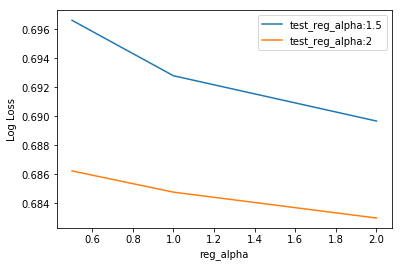

In [29]:
# summarize results
print("Best: %f using %s" % (-gsearch5_1.best_score_, gsearch5_1.best_params_))
test_means = gsearch5_1.cv_results_[ 'mean_test_score' ]
test_stds = gsearch5_1.cv_results_[ 'std_test_score' ]
train_means = gsearch5_1.cv_results_[ 'mean_train_score' ]
train_stds = gsearch5_1.cv_results_[ 'std_train_score' ]

pd.DataFrame(gsearch5_1.cv_results_).to_csv('my_preds_reg_alpha_reg_lambda_1.csv')

# plot results
test_scores = np.array(test_means).reshape(len(reg_alpha), len(reg_lambda))
train_scores = np.array(train_means).reshape(len(reg_alpha), len(reg_lambda))

#log_reg_alpha = [0,0,0,0]
#for index in range(len(reg_alpha)):
#   log_reg_alpha[index] = math.log10(reg_alpha[index])
    
for i, value in enumerate(reg_alpha):
    pyplot.plot(reg_lambda, -test_scores[i], label= 'test_reg_alpha:'   + str(value))
# for i, value in enumerate(reg_alpha):
#     pyplot.plot(reg_lambda, -train_scores[i], label= 'train_reg_alpha:'   + str(value))

pyplot.legend()
pyplot.xlabel( 'reg_alpha' )                                                                                                      
pyplot.ylabel( 'Log Loss' )
pyplot.savefig( 'reg_alpha_vs_reg_lambda1.png' )

当前调参结果：  
最优reg_alpha为2；   
最优reg_lambda为2。